This is a basic notebook that demonstrates how to play with .ldf files in a notebook.

In [1]:
# All the imports, etc.... this would be a good one to fold up, if I knew how...

%load_ext autoreload
%autoreload 2

from base64 import b64encode
import copy
from datetime import datetime
import getopt
import os
import sys

# standard numeric/scientific libraries
import numpy as np
import pandas as pd
import scipy as sp
import scipy.signal as sps
import scipy.fftpack as fftpack 

# plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

try:
    # I use dark mode in my notebooks, this makes the plots match :)
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)    
except:
    pass

# image display
from PIL import Image
import IPython.display 
from IPython.display import HTML

# Add lddecode core modules to path
module_path = os.path.abspath(os.path.join('../lddecode'))
if module_path not in sys.path:
    sys.path.append(module_path)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lddecode.utils import *
from lddecode.plot_utils import *
import lddecode.core as core

In [2]:
# This needs to be done after the first block for some reason?
matplotlib.rc('figure', figsize=(20, 12))

In [8]:
# Would move this to uitls, but needs to run core.LDdecode

def rundecode(filename, outname, firstframe, numframes, system='NTSC', extra_options = {}):
    """ Helper function for notebooks, returns main ldd object and all fields """
    loader = make_loader(filename)

    ldd = core.LDdecode(filename, outname, loader, system=system, analog_audio=44.1)
    ldd.roughseek(firstframe * 2)
    ldd.blackIRE = 7.5

    fields = []
    for i in range(0, numframes * 2):
        fields.append(ldd.readfield())

    write_json(ldd, outname)
    
    return ldd, fields

In [47]:
#filename = '../kila45-crackle.ldf'
filename = '/home/cpage/ld-decode/testdata/ve-snw-cut.lds'
outname = 'devbookv'
system = 'NTSC'

ldd, fields = rundecode(filename, outname, 0, 16, system)

file frame 1 CAV frame 30250
file frame 2 CAV frame 30251
file frame 3 CAV frame 30252
file frame 4 CAV frame 30253
file frame 5 CAV frame 30254
file frame 6 CAV frame 30255
file frame 7 CAV frame 30256
file frame 8 CAV frame 30257
file frame 9 CAV frame 30258
file frame 10 CAV frame 30259
file frame 11 CAV frame 30260
file frame 12 CAV frame 30261
file frame 13 CAV frame 30262
file frame 14 CAV frame 30263
file frame 15 CAV frame 30264


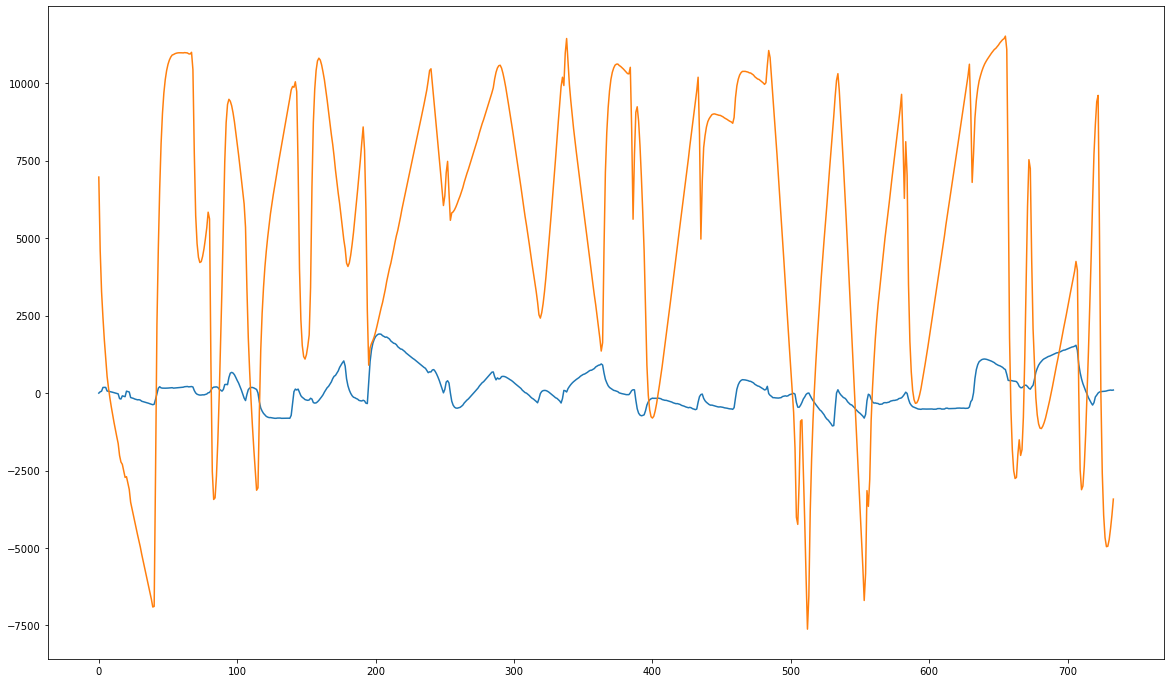

In [53]:
plt.plot(fields[0].dsaudio[::2])
plt.plot(fields[0].dsaudio[1::2])

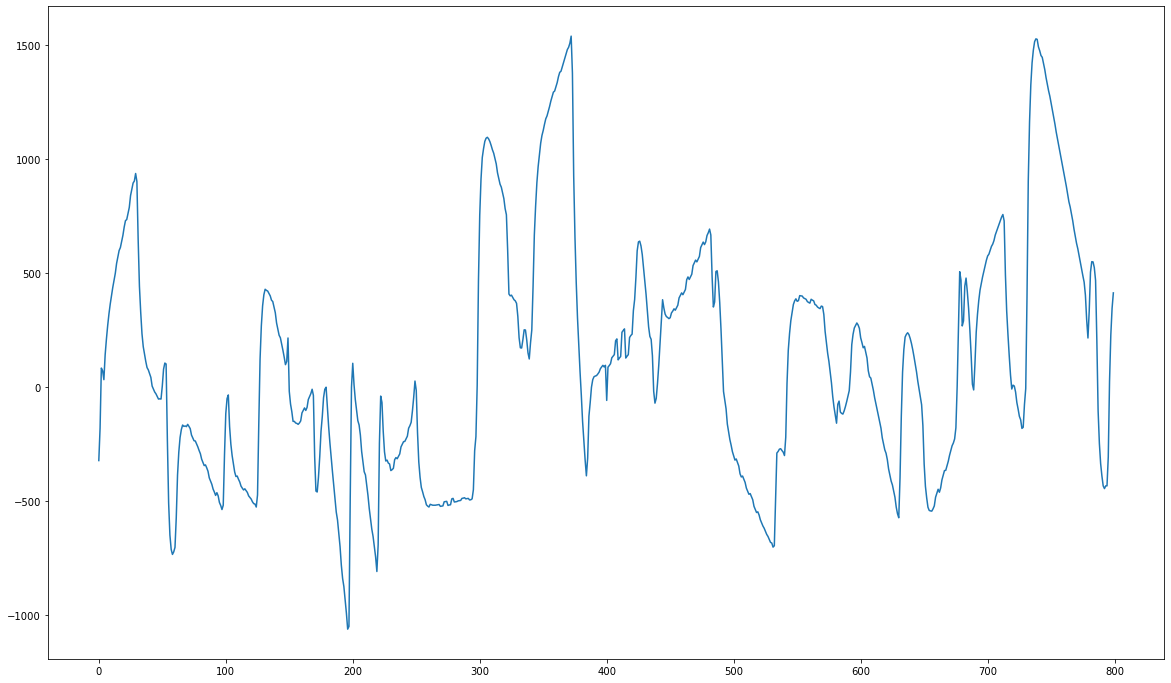

In [48]:
c = np.concatenate([fields[0].dsaudio[-800::2], fields[1].dsaudio[:800:2]])

plt.plot(c)

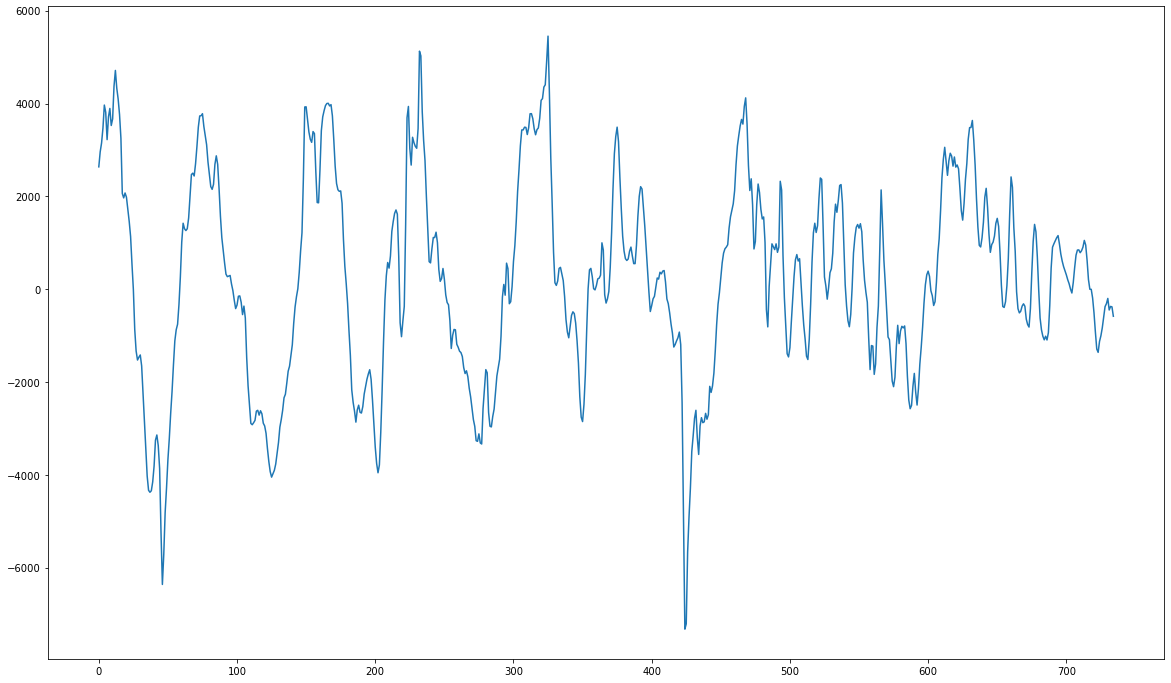

In [34]:
plt.plot(fields[0].dsaudio[::2])

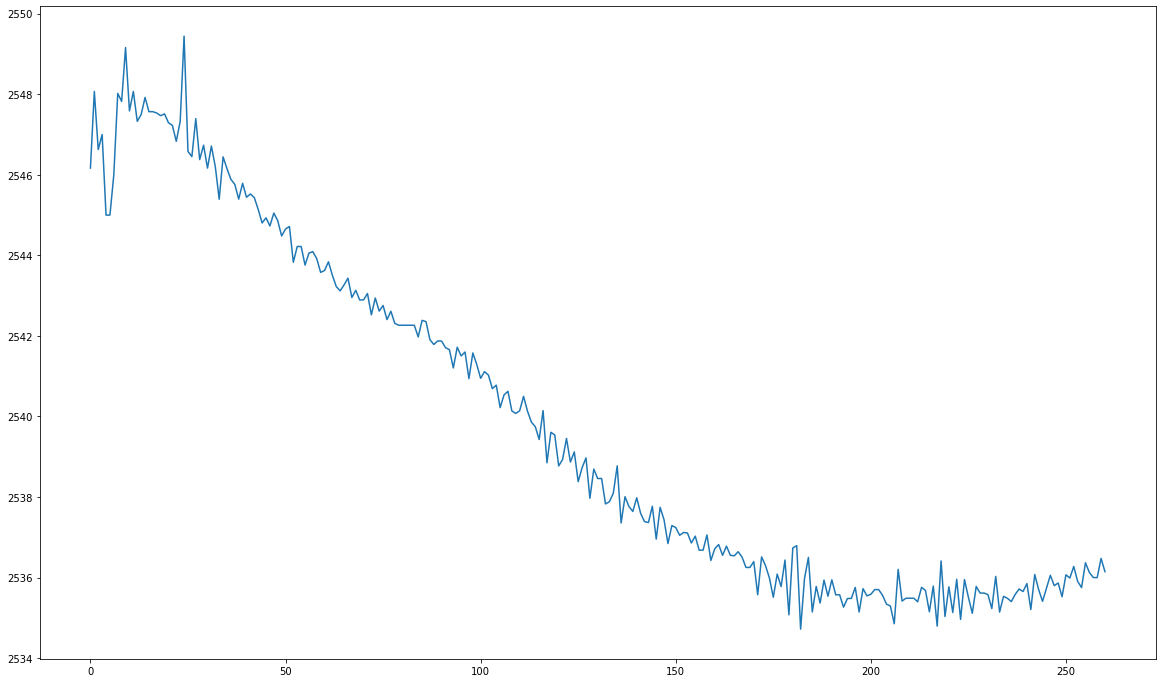

In [35]:
f = fields[2]
plt.plot(np.diff(f.linelocs[:f.linecount]))

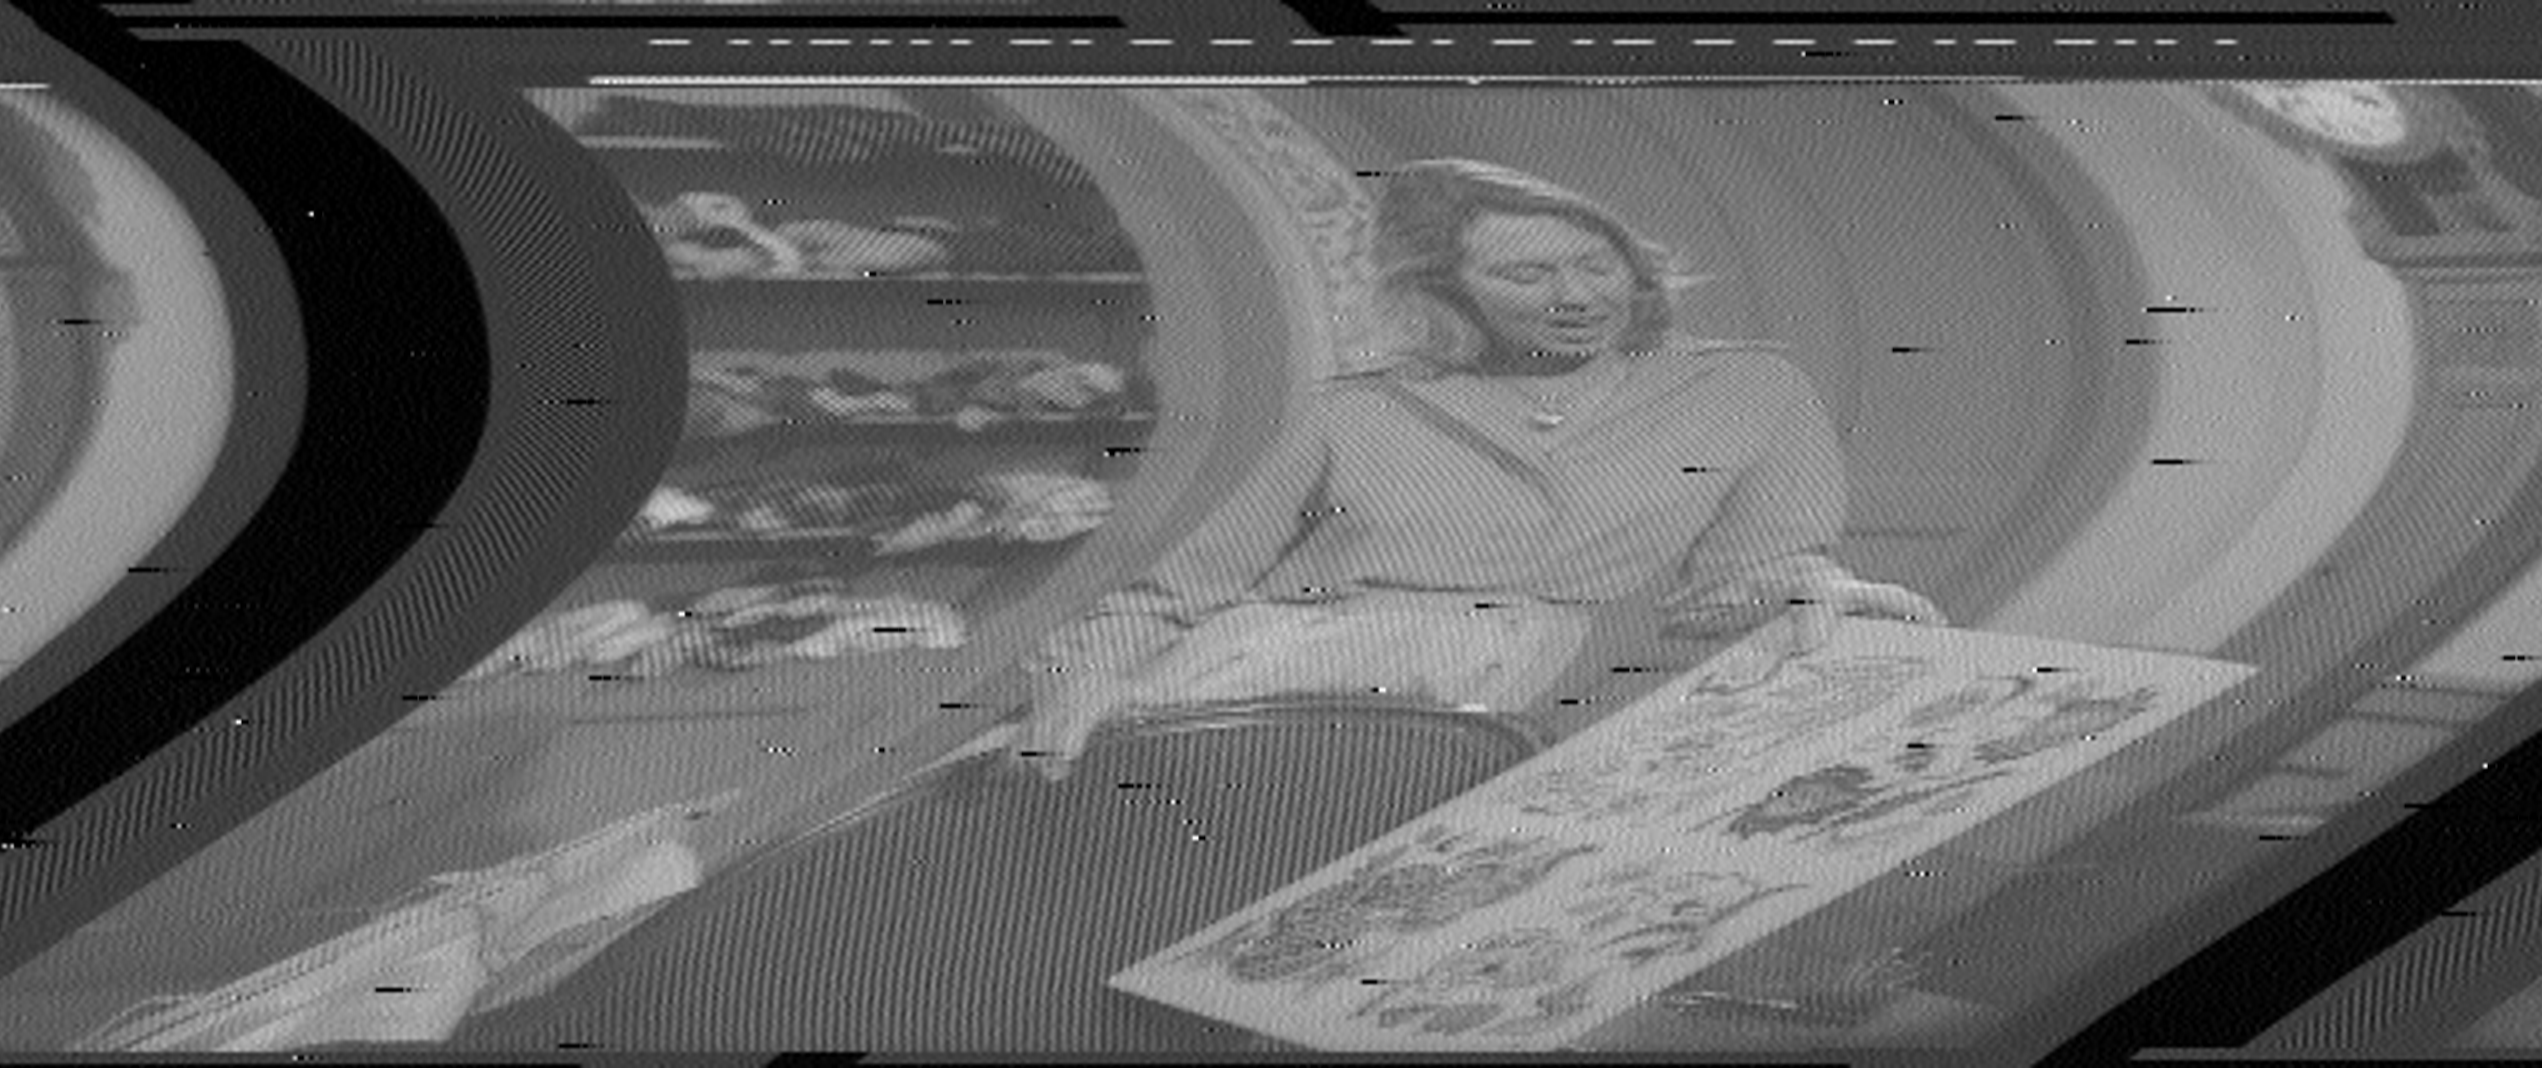

In [36]:
draw_raw_field(fields[0])

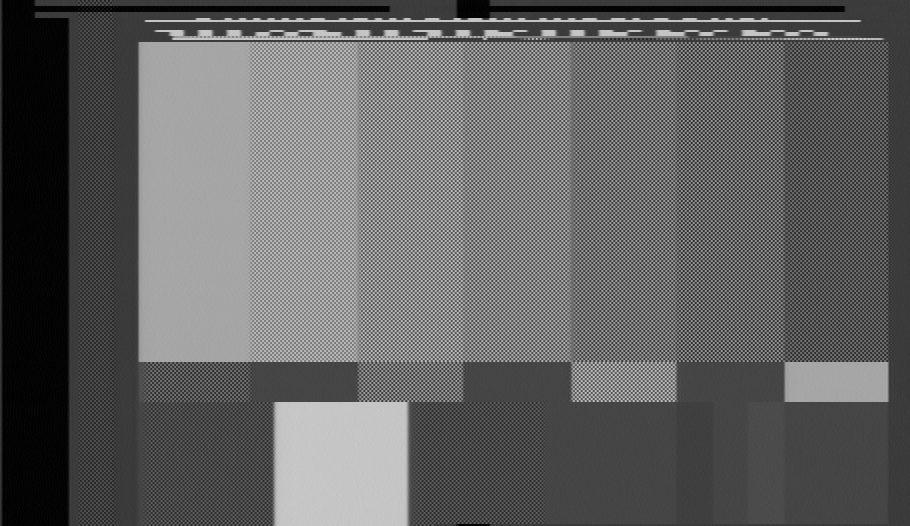

In [9]:
# Displays field
draw_field(fields[0])

In [10]:
# Now run ld-chroma-decoder on the above output, which allows us to display lines and the decoded picture
rgb = RGBoutput(outname)

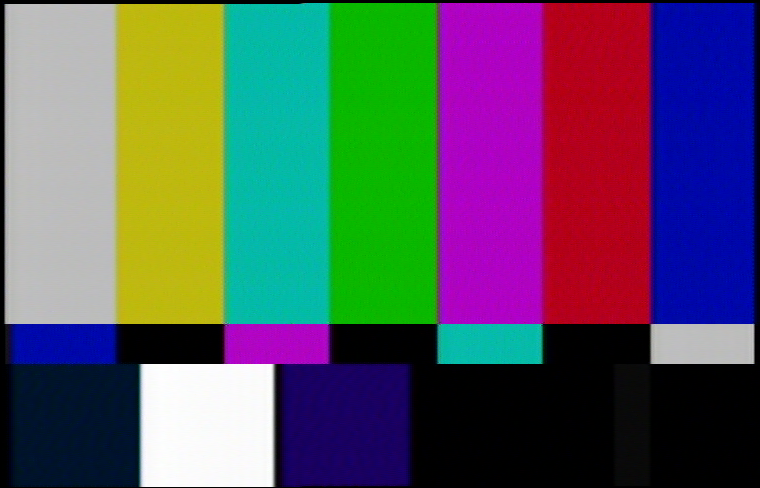

In [11]:
rgb.display(0)

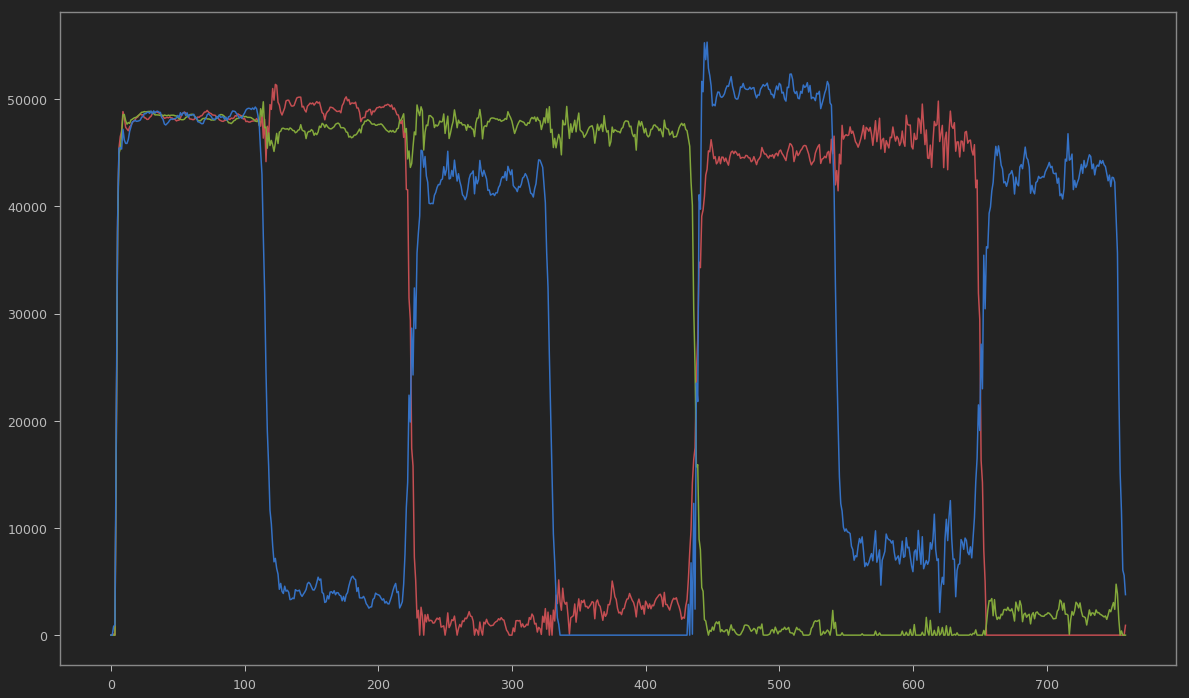

In [12]:
#matplotlib.rc('figure', figsize=(20, 12))
rgb.plotline(0, 240)

In [45]:
class x:
    ABC = 1
    
    def a(self):
        print(ABC)

In [46]:
xx = x()
xx.a()

NameError: name 'ABC' is not defined

In [40]:
xx = x()
xx.ABC

1